# Biodiversity Intactness Index Change in Phoenix, AZ

Author: Matteo Torres

Repository: https://github.com/matteo-torres/bii-project

## Purpose

## Highlights

## About the Data

## References

In [1]:
# Load Libraries
import os
import pandas as pd
import pystac_client
import geopandas as gpd
import rioxarray as rioxr
import planetary_computer
import matplotlib.pyplot as plt
from IPython.display import Image

<Axes: >

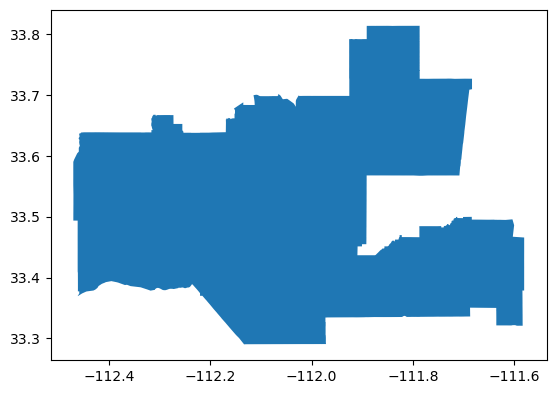

In [2]:
# Create a reproducible file path
fp = os.path.join("data", "tl_2020_04_cousub", "tl_2020_04_cousub.shp")

# Import and read Arizona shapefile
arizona = gpd.read_file(fp)

# Filter Phoenix polygon
phoenix = arizona[arizona["NAME"] == "Phoenix"]

# Plot Phoenix polygon
phoenix.plot()

In [3]:
# Access data
catalog = pystac_client.Client.open("https://planetarycomputer.microsoft.com/api/stac/v1",
                                    modifier = planetary_computer.sign_inplace)

# Bounding box of Phoenix, AZ
bbox_of_interest = [-112.826843, 32.974108, -111.184387, 33.863574]

# Temporal range of interest
time_range = "2017-01-01/2020-01-01"

# Catalog search
search = catalog.search(collections = ["io-biodiversity"],
                        bbox = bbox_of_interest,
                        datetime = time_range)

# Retrieve search items
items = search.item_collection()

# Explore items
items

In [4]:
# Asssign 2017 raster
item_17 = items[3]

# Print the asset key and title
for key in item_17.assets.keys():
    print(key, "--", item_17.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [5]:
# Plot the rendered preview
Image(url = item_17.assets["rendered_preview"].href, width = 500)

In [6]:
# Assign 2020 raster
item_20 = items[0]

# Print the asset key and title
for key in item_20.assets.keys():
    print(key, "--", item_20.assets[key].title)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


In [7]:
# Plot the rendered preview
Image(url = item_20.assets["rendered_preview"].href, width = 500)

In [8]:
# Check for matching coordinate reference systems
print(f"item_17 CRS: EPSG:{item_17.properties['proj:epsg']}")
print(f"item_20 CRS: EPSG:{item_20.properties['proj:epsg']}")
print(f"phoenix CRS: {phoenix.crs}")

item_17 CRS: EPSG:4326
item_20 CRS: EPSG:4326
phoenix CRS: EPSG:4269


In [9]:
# Reproject phoenix shapefile crs
phoenix = phoenix.to_crs(epsg = 4326)

# Verify change
print(f"phoenix CRS: {phoenix.crs}")

phoenix CRS: EPSG:4326


In [10]:
# Access the raster from the data asset
raster_17 = rioxr.open_rasterio(item_17.assets["data"].href)

# Explore the raster
raster_17

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [11]:
# Remove length 1 dimension (band)
raster_17 = raster_17.squeeze().drop_vars("band")
print("Sizes of dimensions:", dict(raster_17.sizes))

Sizes of dimensions: {'y': 7992, 'x': 7992}


In [12]:
# Access the raster from the data asset
raster_20 = rioxr.open_rasterio(item_20.assets["data"].href)

# Explore the raster
raster_20

<xarray.DataArray (band: 1, y: 7992, x: 7992)> Size: 255MB
[63872064 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 64kB -115.4 -115.4 -115.4 ... -108.2 -108.2 -108.2
  * y            (y) float64 64kB 34.74 34.74 34.74 34.74 ... 27.57 27.57 27.57
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [13]:
# Remove length 1 dimension (band)
raster_20 = raster_20.squeeze().drop_vars("band")
print("Sizes of dimensions:", dict(raster_20.sizes))

Sizes of dimensions: {'y': 7992, 'x': 7992}


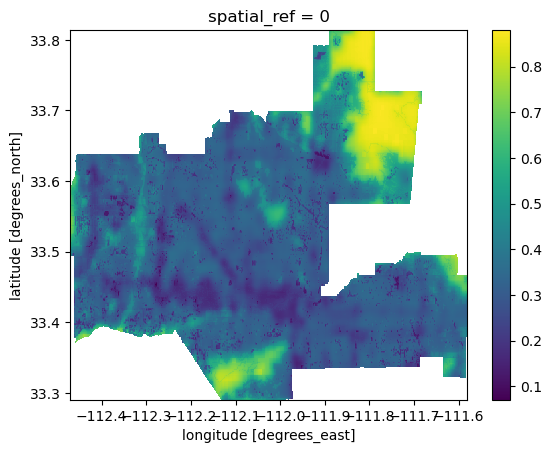

In [14]:
# Clip the 2017 raster to the phoenix total bounds and exact geometry
clip_17 = (raster_17.rio.clip_box(*phoenix.total_bounds)
           .rio.clip(phoenix.geometry))

# Examine results
clip_17.plot()

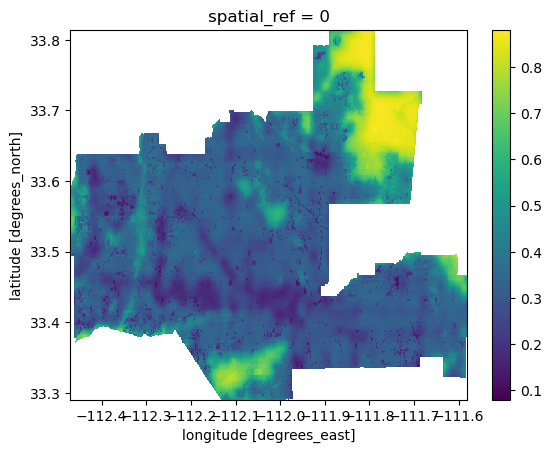

In [15]:
# Clip the 2020 raster to the phoenix total bounds and exact geometry
clip_20 = (raster_20.rio.clip_box(*phoenix.total_bounds)
           .rio.clip(phoenix.geometry))

# Examine results
clip_20.plot()